In [1]:
# Project 9: Content-Based Movie Recommender (Expanded Data)
# Description: A recommendation engine that suggests movies based on content similarity. 
# It uses TF-IDF Vectorization to analyze movie descriptions and genres, then calculates 
# Cosine Similarity to find matches. If you like 'The Avengers', it finds other Action/Sci-Fi movies.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# PART 1: LOAD EXPANDED DATA 
# I added more movies with distinct genres (Action, Romance, Horror) to test accuracy.
data = {
    'title': [
        # Group A: Action / Sci-Fi
        'The Avengers', 
        'Iron Man', 
        'Thor', 
        'Captain America: The First Avenger', 
        'Guardians of the Galaxy',
        
        # Group B: Romance / Drama
        'Titanic', 
        'The Notebook', 
        'La La Land', 
        'Pride and Prejudice',
        
        # Group C: Horror
        'The Conjuring', 
        'It'
    ],
    'overview': [
        # Group A Descriptions
        'Superheroes team up to save the world from aliens and Loki.',
        'A billionaire engineer builds a high-tech suit to fight crime and terrorism.',
        'The god of thunder is banished to Earth to learn humility and save the realms.',
        'A super soldier fights against the organization Hydra in World War II.',
        'A group of intergalactic criminals are forced to work together to stop a warrior.',
        
        # Group B Descriptions
        'A young couple falls in love on a sinking ship in the Atlantic.',
        'A poor man falls in love with a rich woman despite their class differences.',
        'A jazz pianist falls in love with an aspiring actress in Los Angeles.',
        'Sparks fly between a wealthy man and a witty woman in 19th century England.',
        
        # Group C Descriptions
        'Paranormal investigators help a family terrorized by a dark presence in their farmhouse.',
        'A group of bullied kids band together to destroy a shape-shifting monster disguised as a clown.'
    ],
    'genre': [
        'Action Sci-Fi', 'Action Sci-Fi', 'Action Fantasy', 'Action Adventure', 'Action Sci-Fi',
        'Romance Drama', 'Romance Drama', 'Romance Musical', 'Romance Drama',
        'Horror Thriller', 'Horror Thriller'
    ]
}

df = pd.DataFrame(data)
print(f"Data Loaded. Total Movies: {len(df)}")


Data Loaded. Total Movies: 11


In [2]:
# PART 2: CREATE FEATURE SOUP 
# Combine overview and genre to give the model more context
df['content'] = df['overview'] + " " + df['genre']


In [3]:
# PART 3: COMPUTE SIMILARITY 
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content'])

# Calculate Cosine Similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)



 Starting Data Analytics 



C:\Users\haing\AppData\Local\Temp\ipykernel_11060\3250317873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_genres, order=all_genres.value_counts().index, palette='viridis')


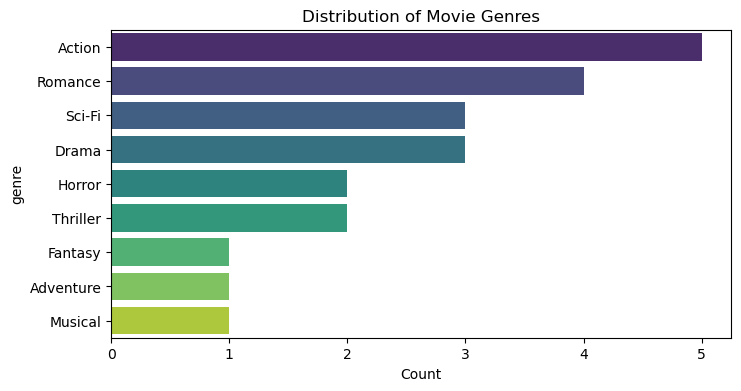

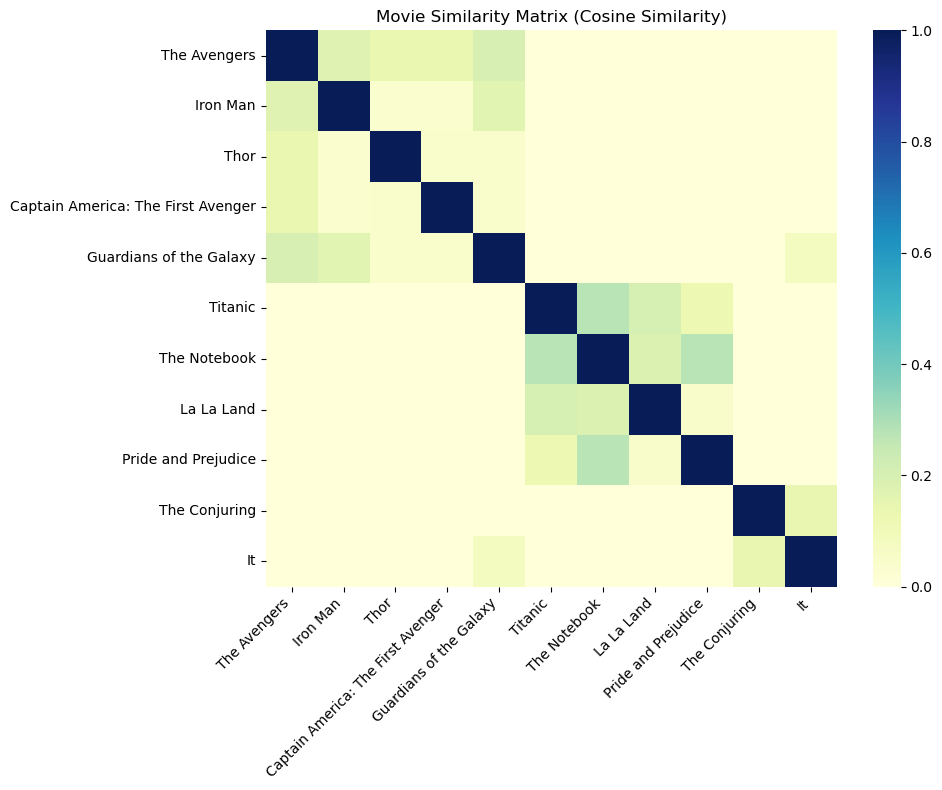

In [4]:
# PART 4: DATA ANALYTICS (EDA) 
print("\n Starting Data Analytics \n")

# A. Genre Frequency
# Visualize the balance of genres in our dataset
plt.figure(figsize=(8, 4))
# Split genres if a movie has multiple, then count
all_genres = df['genre'].str.split().explode()
sns.countplot(y=all_genres, order=all_genres.value_counts().index, palette='viridis')
plt.title("Distribution of Movie Genres")
plt.xlabel("Count")
plt.show()

# B. Similarity Heatmap (The Core Logic Visualization)
# This heatmap shows how similar every movie is to every other movie.
# Darker/Redder squares = High similarity. You should see clusters of similar movies.
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, xticklabels=df['title'], yticklabels=df['title'], cmap='YlGnBu')
plt.title("Movie Similarity Matrix (Cosine Similarity)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Fix label cutoff
plt.show()


In [5]:
# PART 5: RECOMMENDATION FUNCTION 
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get index of the movie
    try:
        idx = df.index[df['title'] == title][0]
    except IndexError:
        return ["Movie not found!"]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 3 most similar movies (skipping index 0 which is itself)
    sim_scores = sim_scores[1:4]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return titles
    return df['title'].iloc[movie_indices]

# TEST CASES 

# Case 1: Action Movie
movie_1 = "The Avengers"
print(f"\n1. Because you watched '{movie_1}':")
print(get_recommendations(movie_1).values)

# Case 2: Romance Movie
movie_2 = "The Notebook"
print(f"\n2. Because you watched '{movie_2}':")
print(get_recommendations(movie_2).values)

# Case 3: Horror Movie
movie_3 = "The Conjuring"
print(f"\n3. Because you watched '{movie_3}':")
print(get_recommendations(movie_3).values)


1. Because you watched 'The Avengers':
['Guardians of the Galaxy' 'Iron Man' 'Thor']

2. Because you watched 'The Notebook':
['Pride and Prejudice' 'Titanic' 'La La Land']

3. Because you watched 'The Conjuring':
['It' 'The Avengers' 'Iron Man']


**ALGORITHM:** TF-IDF (Term Frequency-Inverse Document Frequency)

**PURPOSE:** To convert text into numbers while weighing the importance of words.

**MECHANISM:**

**- TF (Term Frequency):** Increases the score if a word appears often in a specific document (e.g., "Superhero" in Avengers).

**- IDF (Inverse Document Frequency):** Decreases the score if a word appears in ALL documents (e.g., "the", "is"), filtering out noise.